<a href="https://colab.research.google.com/github/SamPxe63/Cadernos/blob/main/Caderno_datacleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas e Configurações

In [ ]:
!pip install sidetable
!pip intall pandas-profiling==3.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "intall" - maybe you meant "install"


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [ ]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [ ]:
def list_attributes(obj):
  """Lista atributos e funções de um objeto"""
  return [attr for attr in obj.__dir__() if not attr.startswith('_')]

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Biblioteca Facilitadora

In [ ]:
df.profile_report()

# Valores Duplicados

## Identificar valores duplicados

In [ ]:
# Identificar valores duplicados
# Retorna valores boleanos
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
# keep = Pega todos os valores duplicados, inclusive o primeiro
df.duplicated(keep=False).sum()

160

In [ ]:
# Identificar quantos valores duplicados há em cada linha
# 5 linhas mais vezes duplicadas
(
  df
 .groupby(df.columns.tolist(), dropna=False)# dropna: Manter os valores nulos e faltantes
 .size() # Pegar linha por linha
 .to_frame('n_duplicates') # Tranformar em df com a nova coluna 'n_duplicates'
 .query('n_duplicates>1') # Query para retorna valores acima de 1 (duplicados)
 .sort_values('n_duplicates', ascending=False)
 .head(5)
)

n_duplicates
survived pclass sex    age sibsp parch fare   embarked class  who   adult_male deck embark_town alive alone              
0        3      male   NaN 0     0     7.8958 S        Third  man   True       NaN  Southampton no    True             13
                                       8.0500 S        Third  man   True       NaN  Southampton no    True             12
                                       7.7500 Q        Third  man   True       NaN  Queenstown  no    True              8
1        3      female NaN 0     0     7.7500 Q        Third  woman False      NaN  Queenstown  yes   True              7
0        2      male   NaN 0     0     0.0000 S        Second man   True       NaN  Southampton no    True              6

## Excluir valores duplicados

In [ ]:
# Remover valores duplicados
# df.drop_duplicates(subset='age')
df.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Valores Nulos

## Identificar valores Nulos

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Identificar e mostrar valores nulos
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# Valores nulos em porcentagem
df.isna().sum() / df.shape[0] * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [ ]:
df_missing = (
df.isna().sum() # Retorna a soma de valores nulos
.to_frame('missing_count') # Tranformar em df
.join((df.isna().sum() / df.shape[0]).to_frame('missing_pct')) # Cria uma tabela, e une a outra apartir das colunas iguais.
.sort_values('missing_count', ascending=False)
)

df_missing.style.format('{:.2%}', subset='missing_pct') # Formatar o df

,missing_count,missing_pct
deck,688,77.22%
age,177,19.87%
embarked,2,0.22%
embark_town,2,0.22%
survived,0,0.00%
pclass,0,0.00%
sex,0,0.00%
sibsp,0,0.00%
parch,0,0.00%
fare,0,0.00%


In [ ]:
# Método em cadeia
(
    df.isna().sum()
    .to_frame('missing_count')
    .assign(missing_pct = lambda x: x.div(len(df))) # Adiciona novas colunas ao df
    .sort_values('missing_count', ascending=False)
)

,missing_count,missing_pct
deck,688,0.772166
age,177,0.198653
embarked,2,0.002245
embark_town,2,0.002245
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000


In [ ]:
# Utilizando a biblioteca sidetable
df.stb.missing()

,missing,total,percent
deck,688,891,77.216611
age,177,891,19.865320
embarked,2,891,0.224467
embark_town,2,891,0.224467
survived,0,891,0.000000
pclass,0,891,0.000000
sex,0,891,0.000000
sibsp,0,891,0.000000
parch,0,891,0.000000
fare,0,891,0.000000


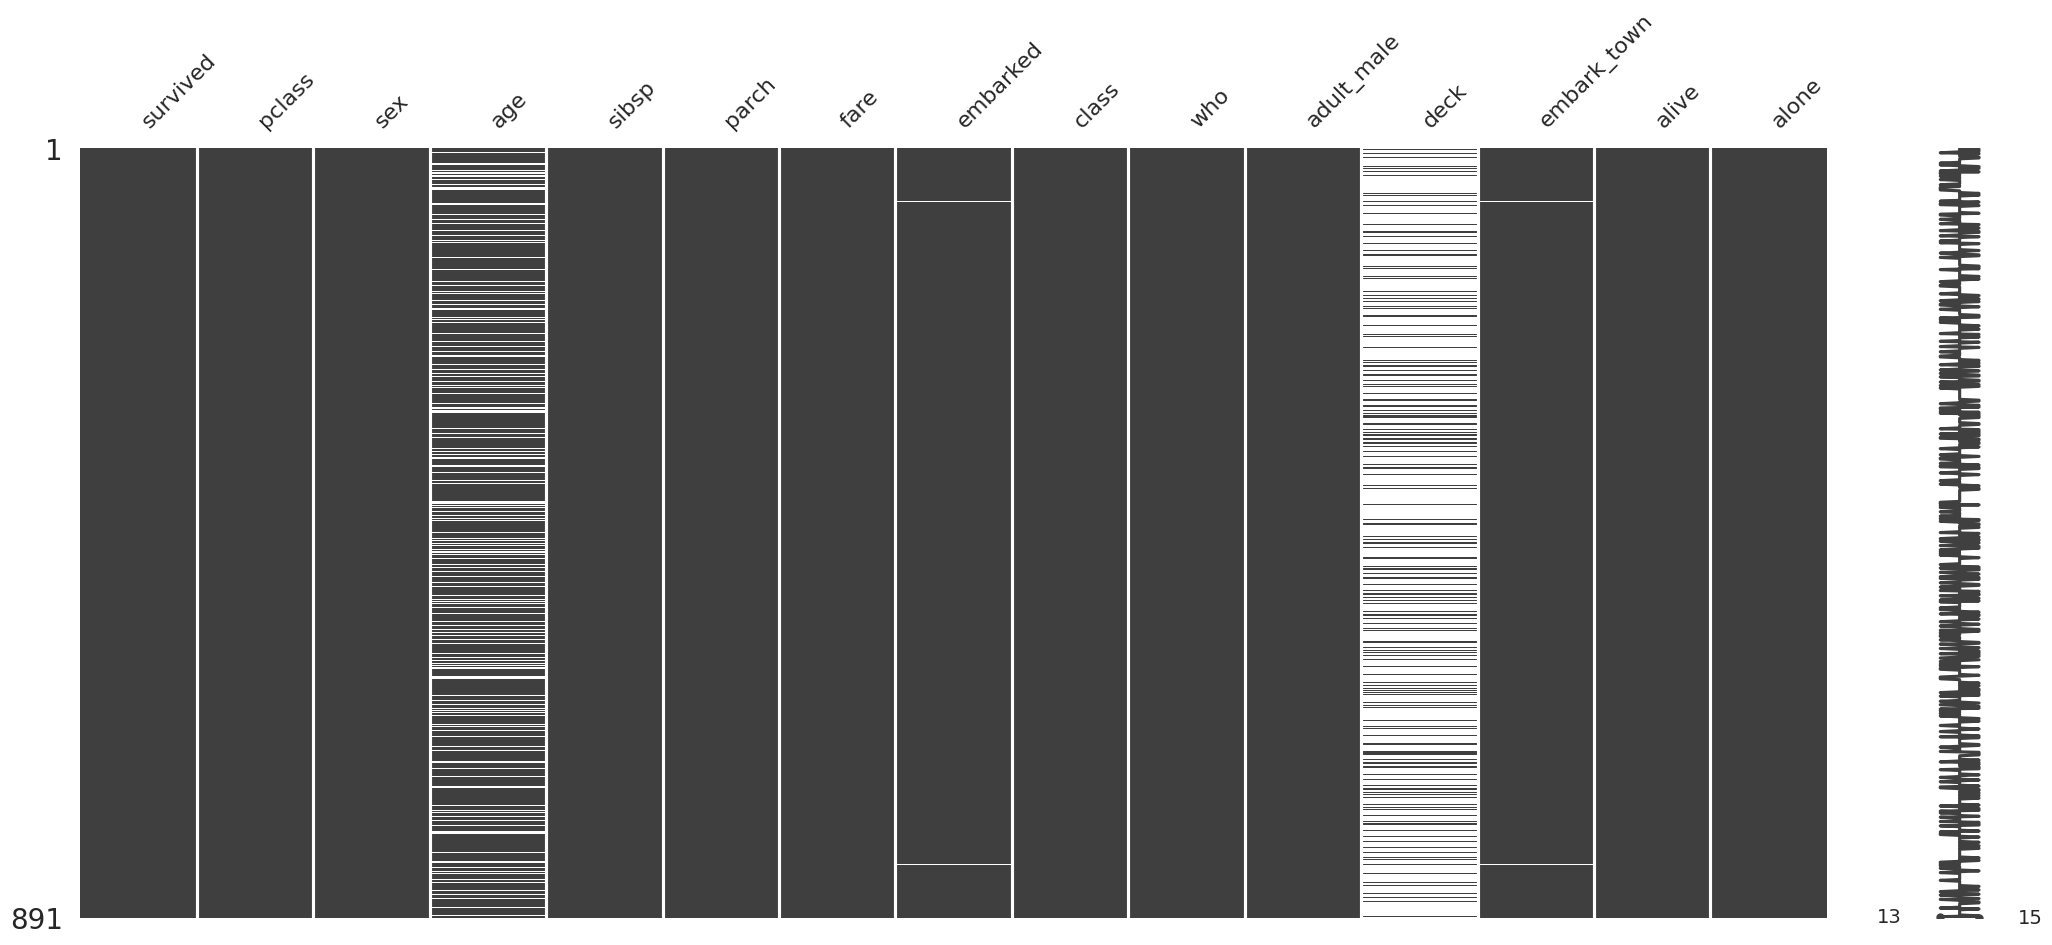

In [ ]:
# Utilizando a biblioteca missgno
msno.matrix(df);

In [ ]:
# Mostrando as linhas com valores faltantes como um todo
# Se tiver uma dado nulo mostre a linha
df[df.isna().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [ ]:
# Mostrando os valores nulos de uma determinada coluna
df[df.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


## Excluindo valores nulos

In [ ]:
# O df que retorna são os valores que não foram excluidos
# Eliminando as linhas da coluna 'deck' que apresentam valores nulos
df.dropna(subset=['deck'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
# Eliminando a coluna deck inteira
df.drop(columns=['deck'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
# Dropando colunas que excedem o máximo de nulos permitido

# Máximo de nulos permitido
max = .7
# Identificando as colunas
cols = df.isna().sum().div(len(df))
cols_drop = cols[cols>max].index

# Dropando as colunas com valors nulos acima de 70%
df.drop(columns=cols_drop)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
# Dropando colunas permanentemente
df.drop(columns=cols_drop, inplace=True)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


## Imputando valores nulos

In [ ]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [ ]:
# Preenche todos os valore nulos por x
# Substituindo os valores nulos da 'age' pela média das idades
# Substituindo os valores nulos da 'embarked' pelo primeiro valor da moda
df.fillna({'age':df.age.mean(), 'embarked':df.embarked.mode()[0]}).tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [ ]:
# Substitui os valores nulos pelos valores passados (anteriores)
df.fillna(method='ffill').tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,19.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [ ]:
# Substitui os valores nulos pelos valores futuros (proximos)
df.fillna(method='bfill').tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,26.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [ ]:
# É o meio termo entre os passado e o futuro
df.age.interpolate().tail()

886    27.0
887    19.0
888    22.5
889    26.0
890    32.0
Name: age, dtype: float64

In [ ]:
(
  df
 .assign(
     age_bfill = df.age.bfill(),
     age_ffill = df.age.ffill(),
     age_interpolate = df.age.interpolate()
 )
 .filter(like='age') # Retorna somente as colunas que tem a palavra x
 .tail()
 .style.highlight_null('red') # Retorna cores para os valores nulos
)

,age,age_bfill,age_ffill,age_interpolate
886,27.000000,27.000000,27.000000,27.000000
887,19.000000,19.000000,19.000000,19.000000
888,nan,26.000000,19.000000,22.500000
889,26.000000,26.000000,26.000000,26.000000
890,32.000000,32.000000,32.000000,32.000000


In [ ]:
# Retorna a média da idade, categorizada pelo sexo
df.groupby('sex')['age'].apply(lambda x: x.fillna(x.mean()))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

# Outliers

In [ ]:
df,_ = datasets.load_wine(return_X_y=True, as_frame=True)
print(df.shape)
df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Identificando Outliers

### Boxplot

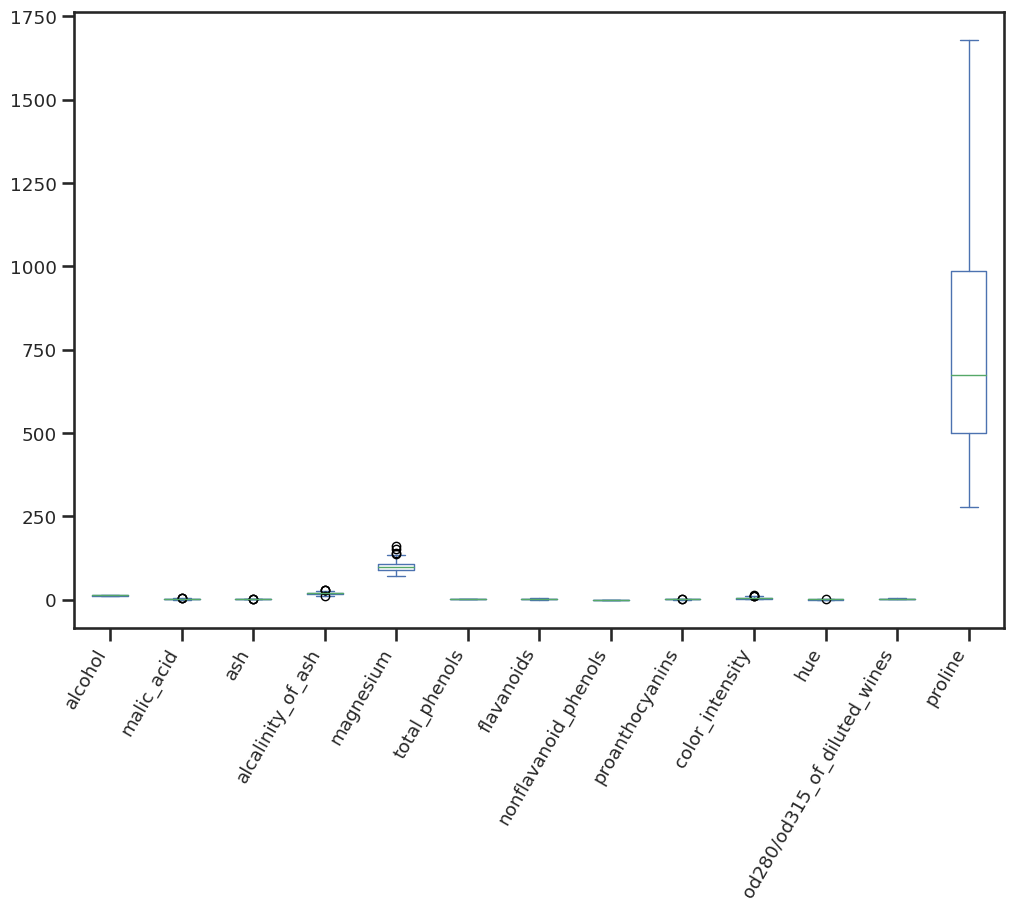

In [ ]:
df.plot.box();
plt.xticks(rotation=60, ha='right');

In [ ]:
from sklearn.preprocessing import scale

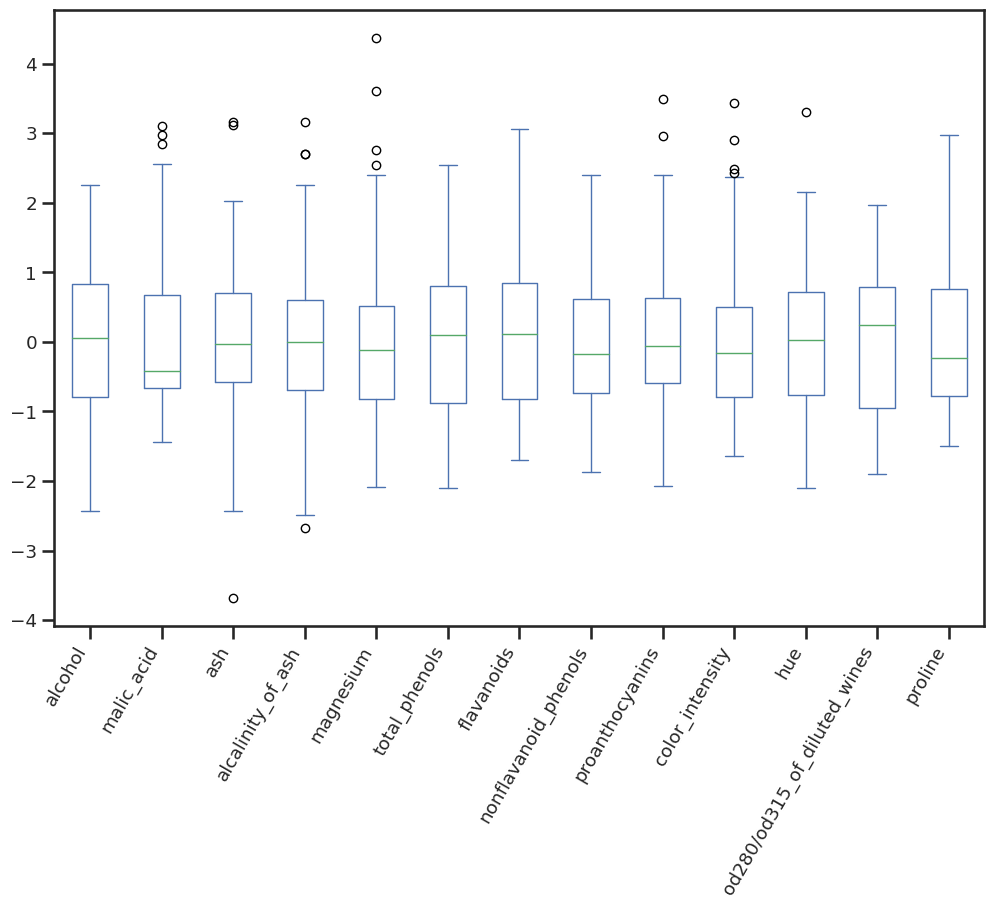

In [ ]:
# Deixando todas as variáveis com escalas iguais
df.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');

### Interquartile range

In [ ]:
def is_outlier(array, extreme=False):
  """Custom function to identify outliers in an array"""
  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

In [ ]:
# Quantidade de Outliers
is_outlier(df.ash).sum()

3

In [ ]:
# Retorna todos os Outliers do DF
df.apply(is_outlier)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,True,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Quantidade de Outliers por categoria
df.apply(is_outlier).sum()

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
# DF de Outliers
df[df.apply(is_outlier).any(axis=1)].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0


In [ ]:
# DF sem Outliers
df[~df.apply(is_outlier).any(axis=1)].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


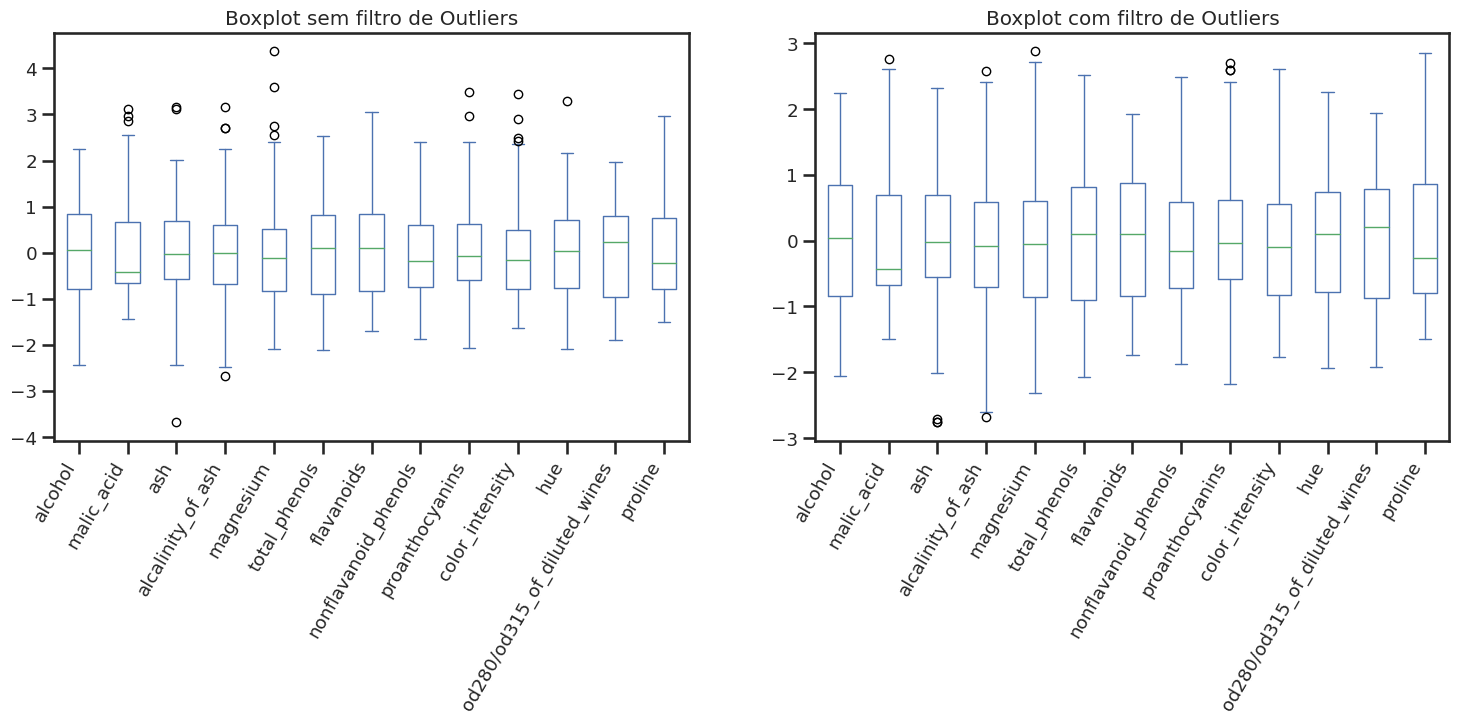

In [ ]:
df_sem_out = df[~df.apply(is_outlier).any(axis=1)]

fig, axes = plt.subplots(ncols=2, figsize=(18,6))
df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de Outliers')
df_sem_out.apply(scale).plot.box(ax=axes[1], title='Boxplot com filtro de Outliers')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

### Z-score

In [ ]:
def zscore_outlier(array):
  scaled_array = scale(array)
  return (scaled_array<-3) | (scaled_array>3)

df_without_outliers = df[~df.apply(zscore_outlier).any(axis=1)]

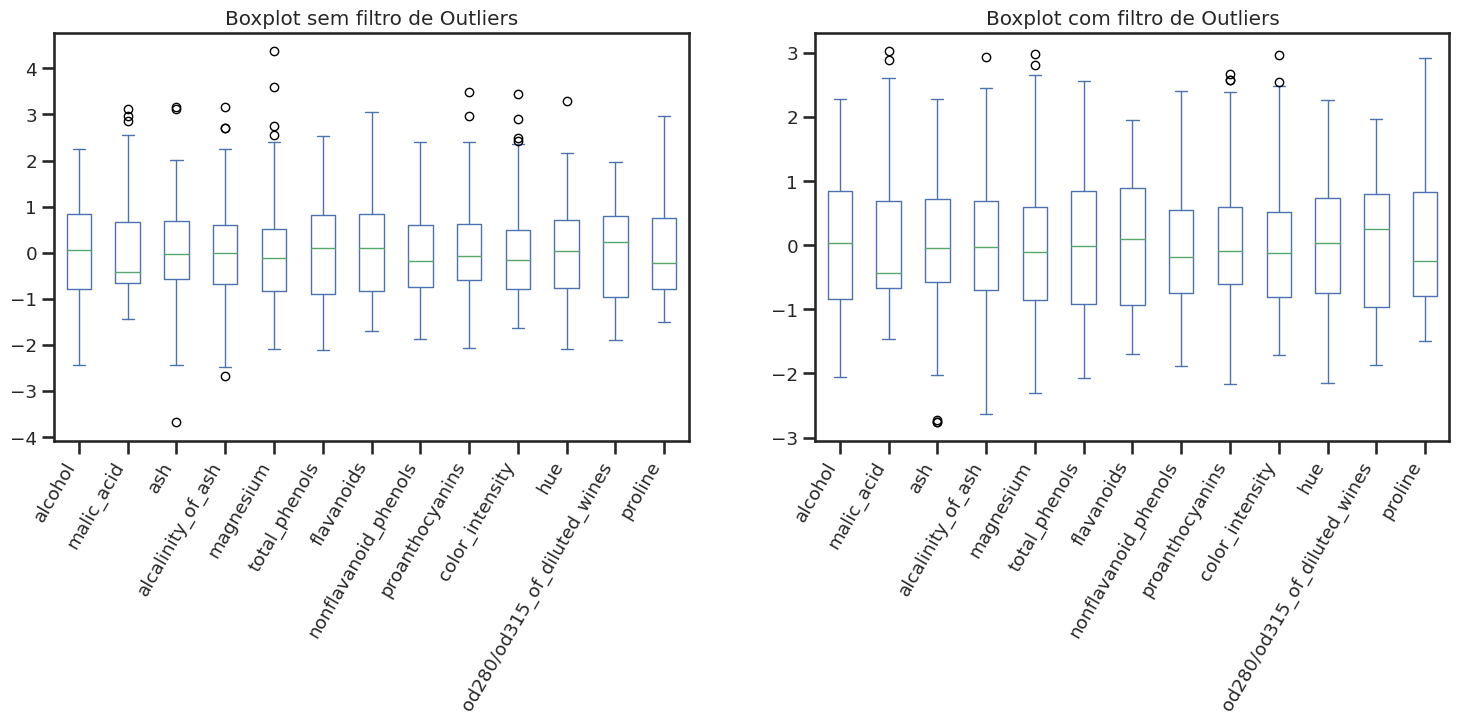

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(18,6))
df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de Outliers')
df_without_outliers.apply(scale).plot.box(ax=axes[1], title='Boxplot com filtro de Outliers')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

## Excluindo e corrigindo Outliers

### Percentis

In [ ]:
# Mostrando percentis
df.describe(percentiles=[.01, .25, .5, .75, .9, .99])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000
99%,14.472800,5.542200,2.989000,28.500000,141.760000,3.595900,3.791400,0.630000,3.033600,11.018500,1.426900,3.843000,1522.360000


In [ ]:
# Essa função substitui os valores Outliers por valores limite (Ex: valores não podem passar de 90% do quartil)
def cap_values(array, lower_quantile=0., upper_quantile=1.):
  array = array.copy()

  lower_quantile = np.quantile(array, lower_quantile)
  upper_quantile = np.quantile(array, upper_quantile)

  array[array<lower_quantile] = lower_quantile
  array[array>upper_quantile] = upper_quantile

  return array

In [ ]:
# Mostrando o percentis após aplicar a função
# Valores não podem passar de 90% do quartil
cap_values(df.ash, upper_quantile=.90).max()

2.7

In [ ]:
# Aplicando em todo o DF
# upper_quantile limita os valores até a % desejada
df.apply(cap_values, upper_quantile=.99).describe(percentiles=[.01, .25, .5, .75, .9, .99])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.997054,2.334294,2.363865,19.486517,99.575955,2.292089,2.021252,0.361685,1.586445,5.042848,0.955729,2.610371,745.869213
std,0.804575,1.111002,0.267036,3.314706,13.680946,0.618829,0.979667,0.124067,0.559125,2.272948,0.223969,0.707571,312.129198
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000
99%,14.409044,5.517406,2.935870,28.500000,139.634800,3.537457,3.759522,0.630000,2.976928,10.850255,1.421587,3.825290,1516.692800


### Log

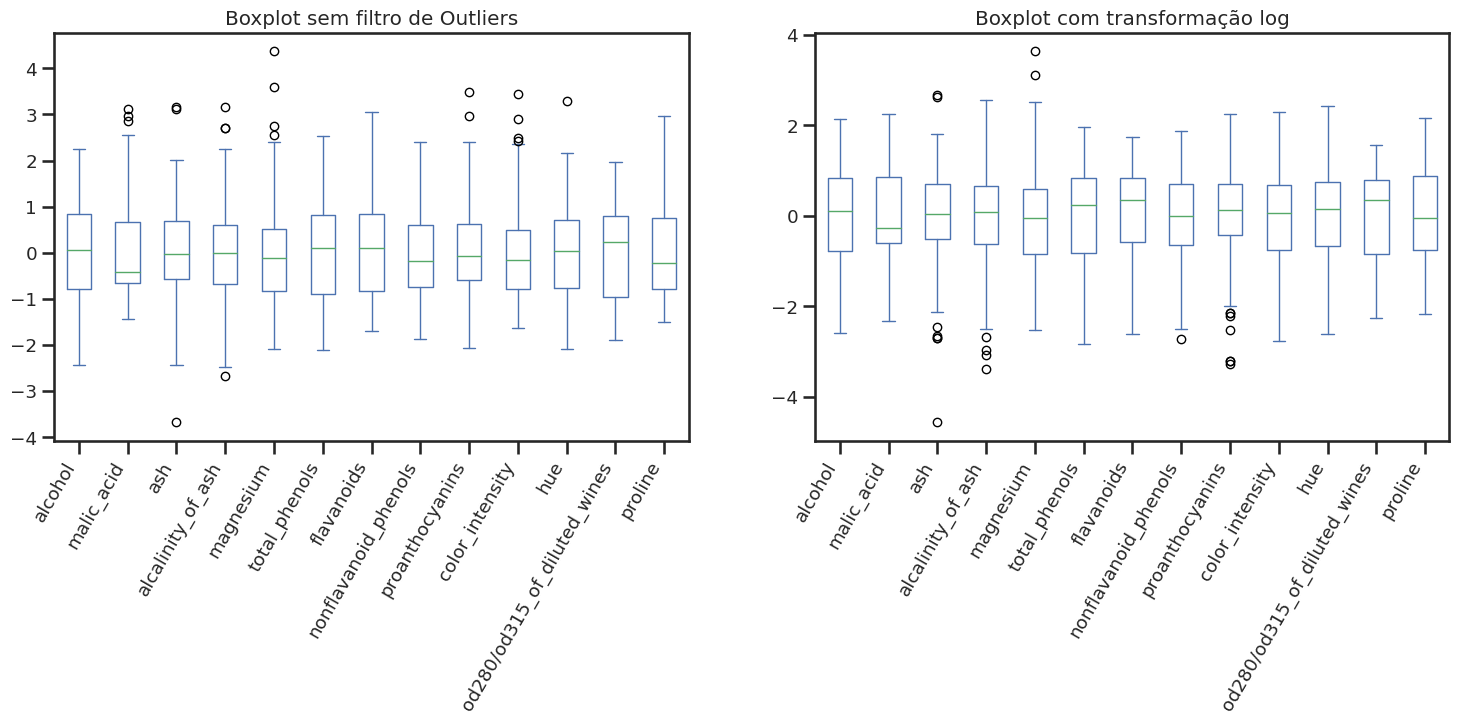

In [ ]:
# Tranformação log
# df.apply(np.log).apply(scale).plot.box()

fig, axes = plt.subplots(ncols=2, figsize=(18,6))
df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de Outliers')
df.apply(np.log).apply(scale).plot.box(ax=axes[1], title='Boxplot com transformação log')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

### Box-cox

In [ ]:
from sklearn.preprocessing import power_transform

In [ ]:
df_boxcox = pd.DataFrame(power_transform(df, method='box-cox'), columns=df.columns)

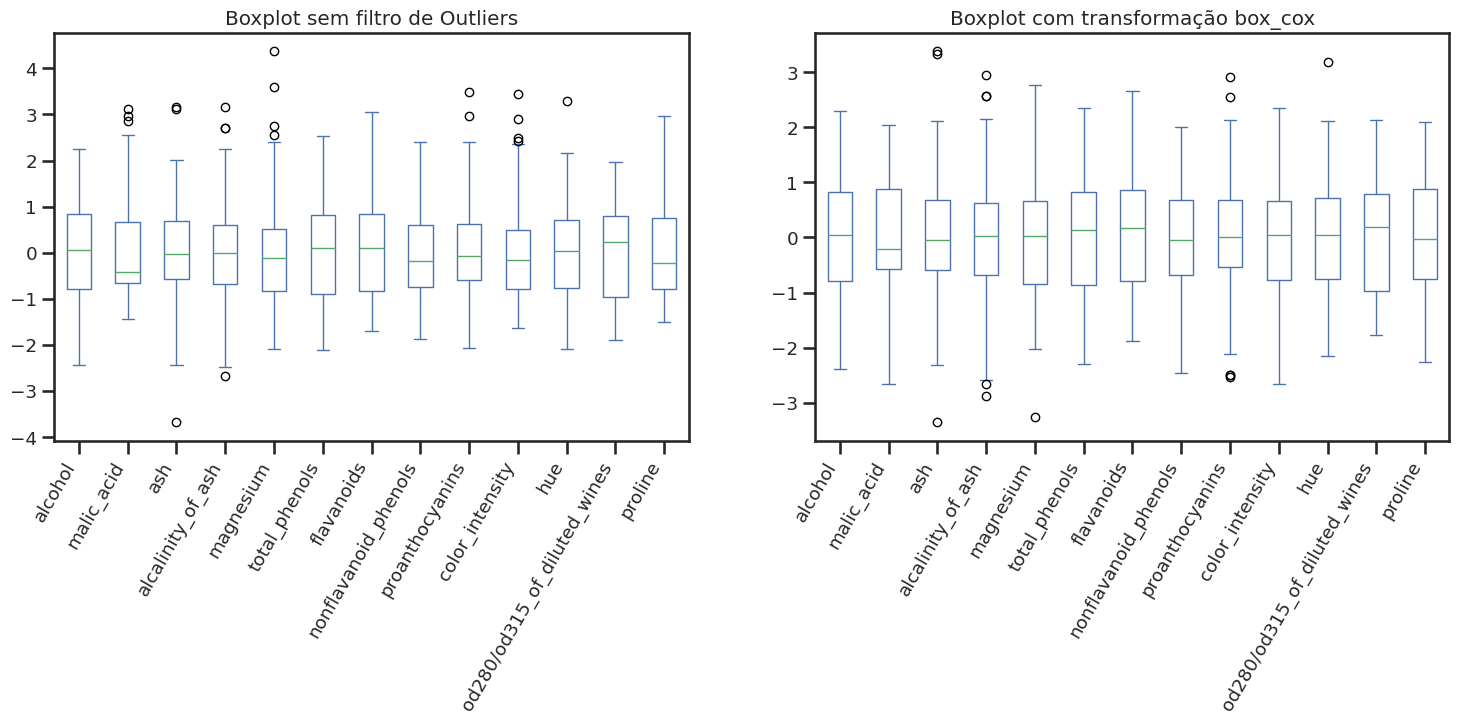

In [ ]:
# Até desvio padrão 3 é aceitavel
fig, axes = plt.subplots(ncols=2, figsize=(18,6))
df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de Outliers')
df_boxcox.plot.box(ax=axes[1], title='Boxplot com transformação box_cox')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

# Datas

Uma vez que a coluna de data esteja no formato certo, podemos utilizar o método `dt` do Pandas para acessar muitas funcionalidades úteis das datas/horários. Vide conjunto de funcionalidades na [documentação oficial](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html).

## Lista de funções datetime

In [ ]:
# Lista de Funções datetime
print(list_attributes(df['Date'].dt))

['ceil', 'date', 'day', 'day_name', 'day_of_week', 'day_of_year', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'floor', 'freq', 'hour', 'is_leap_year', 'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_year_start', 'isocalendar', 'microsecond', 'minute', 'month', 'month_name', 'nanosecond', 'normalize', 'quarter', 'round', 'second', 'strftime', 'time', 'timetz', 'to_period', 'to_pydatetime', 'tz', 'tz_convert', 'tz_localize', 'week', 'weekday', 'weekofyear', 'year']


In [ ]:
df['Date'].dt.day_of_year

0       261
1       194
2       218
3       252
4       290
       ... 
5263    140
5264    146
5265    152
5266    158
5267    159
Name: Date, Length: 5256, dtype: int64

## Tratamento de Datas

In [ ]:
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities']).dropna()
print(df.shape)
df.head()

(5256, 2)


,Date,Fatalities
0,09/17/1908,1.0
1,07/12/1912,5.0
2,08/06/1913,1.0
3,09/09/1913,14.0
4,10/17/1913,30.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5256 non-null   object 
 1   Fatalities  5256 non-null   float64
dtypes: float64(1), object(1)
memory usage: 123.2+ KB


In [ ]:
# Transformando em formato de data diretamento no upload
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities'], parse_dates=['Date']).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5256 non-null   datetime64[ns]
 1   Fatalities  5256 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 123.2 KB


In [ ]:
# Transformando com datetime
df['Date'] = pd.to_datetime(df.Date, format='%m/%d/%Y')

In [ ]:
# Transformando com astype
df['Date'].astype('datetime64[ns]')

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: Date, Length: 5256, dtype: datetime64[ns]

In [ ]:
# Usando a data com index
df_index = df.set_index('Date').sort_index()

In [ ]:
# Filtrando do ano 2000 até o mês de maio de 2005
df_index.loc['2000-05':'2005-05']

,Fatalities
Date,
2000-05-02,2.0
2000-05-03,1.0
2000-05-10,6.0
2000-05-17,3.0
2000-05-21,19.0
...,...
2005-05-05,10.0
2005-05-07,15.0
2005-05-16,10.0


In [ ]:
# Agrupando por ano e somando as fatalidades
# YS é encontrado no offset aliases pandas
df_index.resample('YS').sum()

,Fatalities
Date,
1908-01-01,1.0
1909-01-01,0.0
1910-01-01,0.0
1911-01-01,0.0
1912-01-01,5.0
...,...
2005-01-01,1306.0
2006-01-01,1136.0
2007-01-01,931.0


# Rolling Filters

In [ ]:
# Formatando a data e deixando a data com index
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities'], parse_dates=['Date'], index_col='Date')
df_monthly = df.resample('M').sum().sort_index()
df_monthly.head()

,Fatalities
Date,
1908-09-30,1.0
1908-10-31,0.0
1908-11-30,0.0
1908-12-31,0.0
1909-01-31,0.0


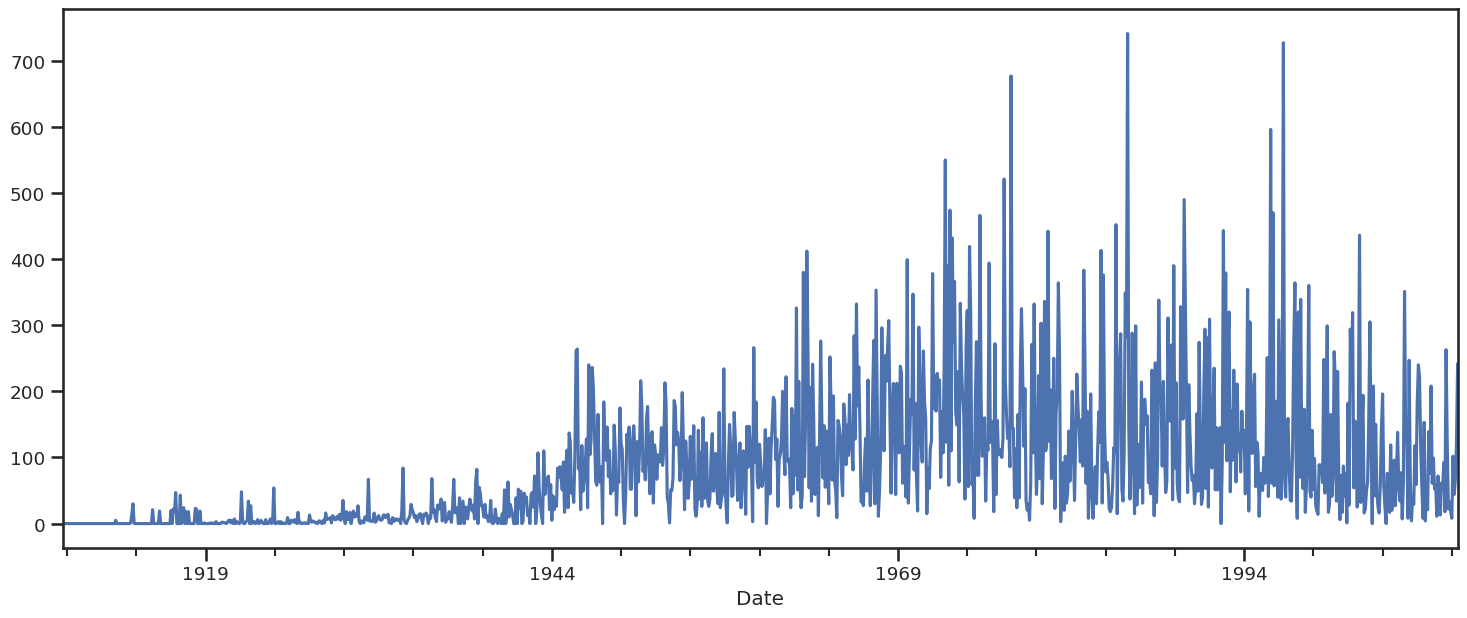

In [ ]:
plt.figure(figsize=(18,7))
df_monthly.Fatalities.plot();

In [ ]:
@interact(window_size=range(12,121,12))
def rolling_mean(window_size):
  plt.figure(figsize=(18,7))
  df_monthly.Fatalities.rolling(window_size).mean().plot()
  plt.show()

interactive(children=(Dropdown(description='window_size', options=(12, 24, 36, 48, 60, 72, 84, 96, 108, 120), …